# IGC File Test
[Aerofiles Docs](http://aerofiles.readthedocs.org/)

In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import aerofiles.igc as igc

In [97]:
igcfile = 'igc/Greg Sadowy.45.2.igc'

In [98]:
with open(igcfile, 'r') as f:
    igcdata = igc.Reader().read(f)

In [99]:
df = pd.DataFrame(igcdata['fix_records'][1])
df.set_index('time', inplace=True)
df = df.reindex(columns = ['lat', 'lon', 'gps_alt', 'pressure_alt', 'validity'])
df.head()

,lat,lon,gps_alt,pressure_alt,validity
time,,,,,
15:28:45,34.193400,-117.32385,522,499,A
15:28:59,34.193383,-117.32385,520,499,A
15:29:04,34.193400,-117.32385,520,499,A
15:29:05,34.193400,-117.32385,519,498,A
15:29:06,34.193383,-117.32385,519,498,A


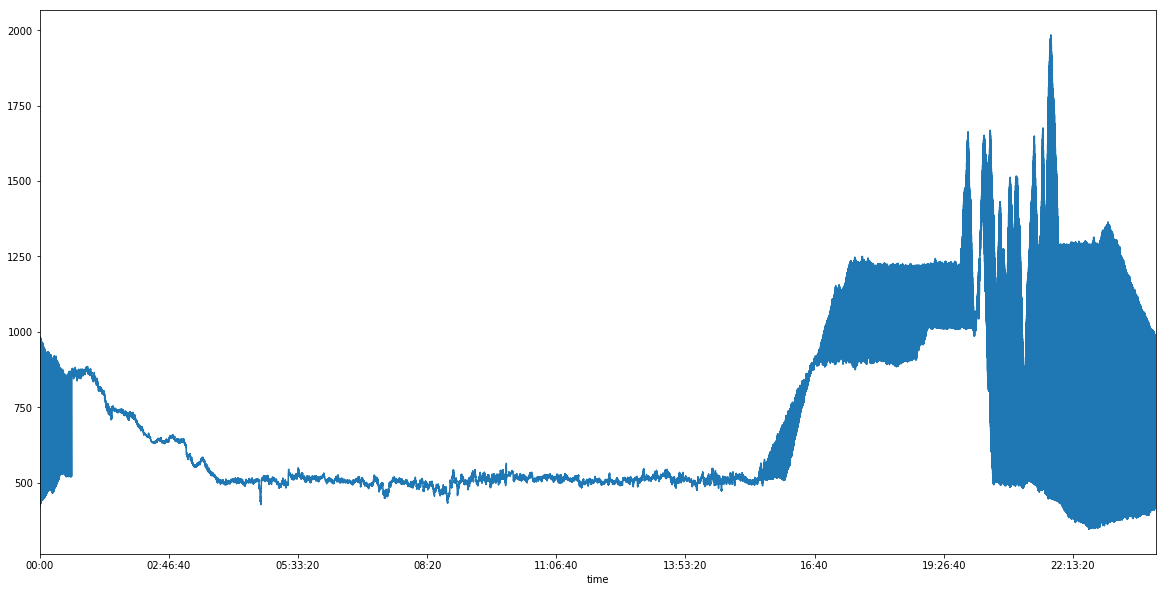

In [118]:
plt.figure(figsize=(20,10))
df.gps_alt.plot()